# CA04 – Ensemble Models

## 1. Data Source and Content

In [1]:
#Importing neccesary libraries

#General libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Libraries for building the models:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
import xgboost as xgb 
from xgboost import XGBClassifier

#Libraries for evaluating model performance:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
#Reading the data
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

In [3]:
#Checking first few rows of data
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [4]:
#Checking shape of the dataframe
df.shape

(48842, 11)

In [5]:
#Checking data types of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


## Label Encoding & Data Splitting

**Encoding**

In [6]:
#Converting categorical variables to dummy variables through one-hot encoding
cols = ["workclass_bin", "education_num_bin", "education_bin", "msr_bin", "age_bin", "race_sex_bin",
                  "capital_gl_bin", "occupation_bin", "hours_per_week_bin"]
encoded_df = pd.get_dummies(df, columns=cols)

In [7]:
encoded_df.head()

,flag,y,workclass_bin_a. no income,workclass_bin_b. income,education_num_bin_a. 0-8,education_num_bin_b. 9-12,education_num_bin_c. 13,education_num_bin_d. 14,education_num_bin_e. 15+,education_bin_a. Low,...,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60
0,train,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,train,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,train,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,train,0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,train,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


**Spliting the data to train and test**

In [8]:
#Splitting the training data and checking the first few rows of train data
train = encoded_df.loc[encoded_df.flag == 'train']
train.head()

,flag,y,workclass_bin_a. no income,workclass_bin_b. income,education_num_bin_a. 0-8,education_num_bin_b. 9-12,education_num_bin_c. 13,education_num_bin_d. 14,education_num_bin_e. 15+,education_bin_a. Low,...,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60
0,train,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,train,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,train,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,train,0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,train,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [9]:
#Splitting the tetsing data and checking the first few rows of test data
test = encoded_df.loc[encoded_df.flag == 'test']
test.head()

,flag,y,workclass_bin_a. no income,workclass_bin_b. income,education_num_bin_a. 0-8,education_num_bin_b. 9-12,education_num_bin_c. 13,education_num_bin_d. 14,education_num_bin_e. 15+,education_bin_a. Low,...,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60
32561,test,0,0,1,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
32562,test,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
32563,test,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
32564,test,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
32565,test,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [10]:
#Removing flag variable since it won't be needed anymore after the data is splitted
train.drop(columns='flag', inplace=True)
test.drop(columns='flag', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
#Checking if flag column was removed from train data
train.head()

,y,workclass_bin_a. no income,workclass_bin_b. income,education_num_bin_a. 0-8,education_num_bin_b. 9-12,education_num_bin_c. 13,education_num_bin_d. 14,education_num_bin_e. 15+,education_bin_a. Low,education_bin_b. Mid,...,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60
0,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [15]:
#Checking if flag column was removed from test data
test.head()

,y,workclass_bin_a. no income,workclass_bin_b. income,education_num_bin_a. 0-8,education_num_bin_b. 9-12,education_num_bin_c. 13,education_num_bin_d. 14,education_num_bin_e. 15+,education_bin_a. Low,education_bin_b. Mid,...,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60
32561,0,0,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
32562,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
32563,1,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
32564,1,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
32565,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [16]:
#Extracting the target variable "y" from train data and assigning it to new variable "y_train"
y_train = train['y']
#Extracting all the other independent variables from train data and assigning them to a new variable "x_train"
x_train = train.drop('y', axis=1)

In [17]:
#Extracting the target variable "y" from test data and assigning it to new variable "y_test"
y_test = test['y']
#Extracting all the other independent variables from test data and assigning them to a new variable "x_train"
x_test = test.drop('y', axis=1)

## 2. Building a Random Forest Model

**Model 1 - Randon Forest**

**Accuracy vs. n_estimators**

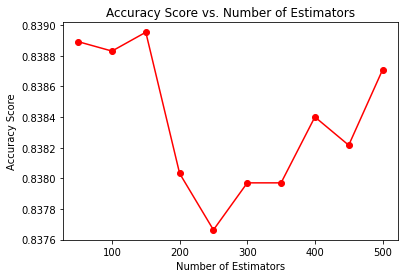

In [18]:
#Creating a loop to train and test multiple Random Forest classifiers with different number of n_estimators
#and calculating the accuracy score for each one. Then, plotting the results in a line chart.
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for n in n_estimator:
  RF_model = RandomForestClassifier(n_estimators=n, random_state=101)
  RF_model.fit(x_train,y_train)
  y_pred = RF_model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

pd.Series(results, n_estimator).plot(color='red', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Number of Estimators')
plt.show()

**AUC vs. n_estimators**

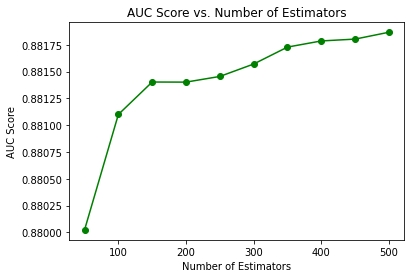

In [25]:
#Creating a loop to train and test multiple Random Forest classifiers with different number of n_estimators
#and calculating the AUC score for each one. Then, plotting the results in a line chart.
results = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for n in n_estimators:
    RF_model = RandomForestClassifier(n_estimators=n, random_state=101)
    RF_model.fit(x_train, y_train)
    y_pred_proba = RF_model.predict_proba(x_test)[:, 1]
    results.append(roc_auc_score(y_test, y_pred_proba))

pd.Series(results, n_estimators).plot(color='green', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC Score')
plt.title('AUC Score vs. Number of Estimators')
plt.show()

1. Write your observations about the Classifier’s behavior with respect to the number of estimators

The accuracy score increases as the number of estimators increases up to around 200, after which it drastically decreases and does not improve much further. The AUC score, on the other side, continues to improve with a larger number of estimators, indicating that the model might possibly benefit from even more estimators.

2. Is there an optimal value of the estimator within the given range?

For accuracy score, the optimal value is around 170 while for AUC score it is around 500.

## 3. Building AdaBoost, Gradient Boost, and XGB

**Model 2 - AdaBoost**

**Accuracy vs. n_estimators**

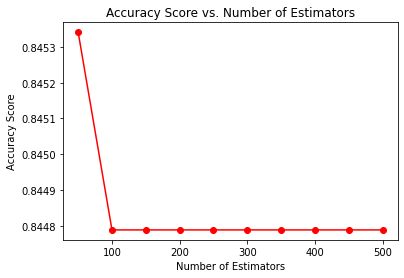

In [26]:
#Creating a loop to train and test multiple AdaBoost classifiers with different number of n_estimators
#and calculating the accuracy score for each one. Then, plotting the results in a line chart.
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for n in n_estimator:
  Ada_model = AdaBoostClassifier(n_estimators=n, random_state=101)
  Ada_model.fit(x_train,y_train)
  y_pred = Ada_model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

pd.Series(results, n_estimator).plot(color='red', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Number of Estimators')
plt.show()

**AUC vs. n_estimators**

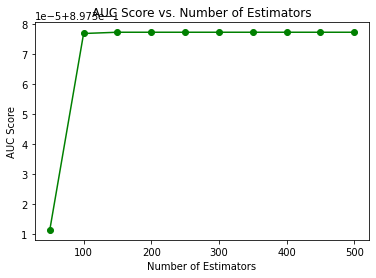

In [27]:
#Creating a loop to train and test multiple AdaBoost classifiers with different number of n_estimators
#and calculating the AUC score for each one. Then, plotting the results in a line chart.
results = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for n in n_estimators:
    Ada_model = AdaBoostClassifier(n_estimators=n, random_state=101)
    Ada_model.fit(x_train, y_train)
    y_pred_proba = Ada_model.predict_proba(x_test)[:, 1]
    results.append(roc_auc_score(y_test, y_pred_proba))

pd.Series(results, n_estimators).plot(color='green', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC Score')
plt.title('AUC Score vs. Number of Estimators')
plt.show()

1. Write your observations about the Classifier’s behavior with respect to the number of estimators

In AdaBoost we see a decrease in accuracy score as the number of estimators increase and an incrase in AUC score as the number of estimators increases.

2. Is there an optimal value of the estimator within the given range?

The optimal value for accuracy score is around 20-30 and for AUC score the oprimal value will have a range of 100-500 since we see that the values are almost equally high after reaching 100 all the way until the value of 500.

**Model 3 - Gradient Boost**

**Accuracy vs. n_estimators**

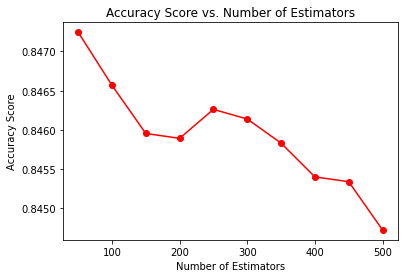

In [28]:
#Creating a loop to train and test multiple Gradient Boost classifiers with different number of n_estimators
#and calculating the accuracy score for each one. Then, plotting the results in a line chart.
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for n in n_estimator:
  GB_model = GradientBoostingClassifier(n_estimators=n, random_state=101)
  GB_model.fit(x_train,y_train)
  y_pred = GB_model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

pd.Series(results, n_estimator).plot(color='red', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Number of Estimators')
plt.show()

**AUC vs. n_estimators**

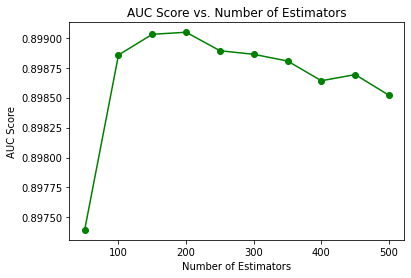

In [29]:
#Creating a loop to train and test multiple Gradient Boost classifiers with different number of n_estimators
#and calculating the AUC score for each one. Then, plotting the results in a line chart.
results = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for n in n_estimators:
    GB_model = GradientBoostingClassifier(n_estimators=n, random_state=101)
    GB_model.fit(x_train, y_train)
    y_pred_proba = GB_model.predict_proba(x_test)[:, 1]
    results.append(roc_auc_score(y_test, y_pred_proba))

pd.Series(results, n_estimators).plot(color='green', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC Score')
plt.title('AUC Score vs. Number of Estimators')
plt.show()

1. Write your observations about the Classifier’s behavior with respect to the number of estimators

With respect to accuracy score, Gradient Boost's performance decreases as the number of estimators increases and for AUC score - it performs generally better wth the higher number of estimators.

2. Is there an optimal value of the estimator within the given range?

The optimal value for accuracy score is somewhere around 10-20 while for AUC it is around 200.

**Model 4 - XGB**

In [30]:
#The feature names contain special characters like periods or spaces that were not be compatible with the XGBoost
#versions. I needed to rename the features so they contain only alphanumeric characters and underscores, pass a list
#of new columns and replace them with old columns in x_test, x_train, y_test, and y_train data. After that I was able
#to run the XGB Classifier

new_col_names = ['workclass_bin_a_no_income', 'workclass_bin_b_income',
                 'education_num_bin_a_0to8', 'education_num_bin_b_9to12',
                 'education_num_bin_c_13', 'education_num_bin_d_14',
                 'education_num_bin_e_15plus', 'education_bin_a_Low',
                 'education_bin_b_Mid', 'education_bin_c_Bachelors',
                 'education_bin_d_Masters', 'education_bin_e_High',
                 'msr_bin_a_Low', 'msr_bin_b_Mid', 'msr_bin_c_High',
                 'age_bin_a_0to25', 'age_bin_b_26to30_71to100',
                 'age_bin_c_31to35_61to70', 'age_bin_d_36to40_56to60',
                 'age_bin_e_40to55', 'race_sex_bin_a_Low',
                 'race_sex_bin_b_Mid', 'race_sex_bin_c_High',
                 'capital_gl_bin_a_e_0', 'capital_gl_bin_b_l_0',
                 'capital_gl_bin_c_g_0', 'occupation_bin_a_Low',
                 'occupation_bin_b_MidtoLow', 'occupation_bin_c_MidtoMid',
                 'occupation_bin_d_MidtoHigh', 'occupation_bin_e_High',
                 'hours_per_week_bin_a_0to30', 'hours_per_week_bin_b_31to40',
                 'hours_per_week_bin_c_71to100', 'hours_per_week_bin_d_41to50_61to70',
                 'hours_per_week_bin_e_51to60']

x_test.columns = new_col_names

In [31]:
new_col_names = ['workclass_bin_a_no_income', 'workclass_bin_b_income',
                 'education_num_bin_a_0to8', 'education_num_bin_b_9to12',
                 'education_num_bin_c_13', 'education_num_bin_d_14',
                 'education_num_bin_e_15plus', 'education_bin_a_Low',
                 'education_bin_b_Mid', 'education_bin_c_Bachelors',
                 'education_bin_d_Masters', 'education_bin_e_High',
                 'msr_bin_a_Low', 'msr_bin_b_Mid', 'msr_bin_c_High',
                 'age_bin_a_0to25', 'age_bin_b_26to30_71to100',
                 'age_bin_c_31to35_61to70', 'age_bin_d_36to40_56to60',
                 'age_bin_e_40to55', 'race_sex_bin_a_Low',
                 'race_sex_bin_b_Mid', 'race_sex_bin_c_High',
                 'capital_gl_bin_a_e_0', 'capital_gl_bin_b_l_0',
                 'capital_gl_bin_c_g_0', 'occupation_bin_a_Low',
                 'occupation_bin_b_MidtoLow', 'occupation_bin_c_MidtoMid',
                 'occupation_bin_d_MidtoHigh', 'occupation_bin_e_High',
                 'hours_per_week_bin_a_0to30', 'hours_per_week_bin_b_31to40',
                 'hours_per_week_bin_c_71to100', 'hours_per_week_bin_d_41to50_61to70',
                 'hours_per_week_bin_e_51to60']

y_test.columns = new_col_names

In [32]:
new_col_names = ['workclass_bin_a_no_income', 'workclass_bin_b_income',
                 'education_num_bin_a_0to8', 'education_num_bin_b_9to12',
                 'education_num_bin_c_13', 'education_num_bin_d_14',
                 'education_num_bin_e_15plus', 'education_bin_a_Low',
                 'education_bin_b_Mid', 'education_bin_c_Bachelors',
                 'education_bin_d_Masters', 'education_bin_e_High',
                 'msr_bin_a_Low', 'msr_bin_b_Mid', 'msr_bin_c_High',
                 'age_bin_a_0to25', 'age_bin_b_26to30_71to100',
                 'age_bin_c_31to35_61to70', 'age_bin_d_36to40_56to60',
                 'age_bin_e_40to55', 'race_sex_bin_a_Low',
                 'race_sex_bin_b_Mid', 'race_sex_bin_c_High',
                 'capital_gl_bin_a_e_0', 'capital_gl_bin_b_l_0',
                 'capital_gl_bin_c_g_0', 'occupation_bin_a_Low',
                 'occupation_bin_b_MidtoLow', 'occupation_bin_c_MidtoMid',
                 'occupation_bin_d_MidtoHigh', 'occupation_bin_e_High',
                 'hours_per_week_bin_a_0to30', 'hours_per_week_bin_b_31to40',
                 'hours_per_week_bin_c_71to100', 'hours_per_week_bin_d_41to50_61to70',
                 'hours_per_week_bin_e_51to60']

x_train.columns = new_col_names

In [33]:
new_col_names = ['workclass_bin_a_no_income', 'workclass_bin_b_income',
                 'education_num_bin_a_0to8', 'education_num_bin_b_9to12',
                 'education_num_bin_c_13', 'education_num_bin_d_14',
                 'education_num_bin_e_15plus', 'education_bin_a_Low',
                 'education_bin_b_Mid', 'education_bin_c_Bachelors',
                 'education_bin_d_Masters', 'education_bin_e_High',
                 'msr_bin_a_Low', 'msr_bin_b_Mid', 'msr_bin_c_High',
                 'age_bin_a_0to25', 'age_bin_b_26to30_71to100',
                 'age_bin_c_31to35_61to70', 'age_bin_d_36to40_56to60',
                 'age_bin_e_40to55', 'race_sex_bin_a_Low',
                 'race_sex_bin_b_Mid', 'race_sex_bin_c_High',
                 'capital_gl_bin_a_e_0', 'capital_gl_bin_b_l_0',
                 'capital_gl_bin_c_g_0', 'occupation_bin_a_Low',
                 'occupation_bin_b_MidtoLow', 'occupation_bin_c_MidtoMid',
                 'occupation_bin_d_MidtoHigh', 'occupation_bin_e_High',
                 'hours_per_week_bin_a_0to30', 'hours_per_week_bin_b_31to40',
                 'hours_per_week_bin_c_71to100', 'hours_per_week_bin_d_41to50_61to70',
                 'hours_per_week_bin_e_51to60']

y_train.columns = new_col_names

**Accuracy vs. n_estimators**

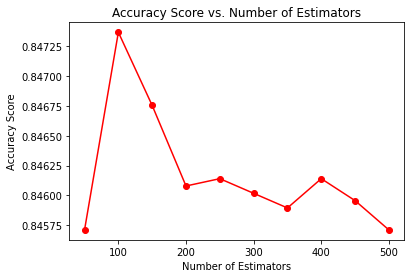

In [23]:
#Creating a loop to train and test multiple XGB classifiers with different number of n_estimators
#and calculating the accuracy score for each one. Then, plotting the results in a line chart.
results = []
n_estimator = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for n in n_estimator:
    XGB_model = xgb.XGBClassifier(n_estimators=n, random_state=101)
    XGB_model.fit(x_train, y_train)
    y_pred = XGB_model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

pd.Series(results, n_estimator).plot(color='red', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Number of Estimators')
plt.show()

**AUC vs. n_estimators**

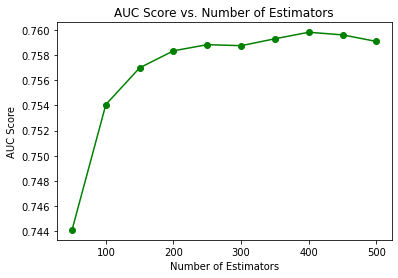

In [34]:
#Creating a loop to train and test multiple XGB classifiers with different number of n_estimators
#and calculating the AUC score for each one. Then, plotting the results in a line chart.
results = []
n_estimator = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for n in n_estimator:
    XGB_model = xgb.XGBClassifier(n_estimators=n, random_state=101)
    XGB_model.fit(x_train, y_train)
    y_pred = XGB_model.predict(x_test)
    auc = roc_auc_score(y_test, y_pred)
    results.append(auc)

pd.Series(results, n_estimator).plot(color='green', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC Score')
plt.title('AUC Score vs. Number of Estimators')
plt.show()

1. Write your observations about the Classifier’s behavior with respect to the number of estimators

XGB's performance behaves similar to Gradient Boost's accuracy scores - the accuracy decreases as the number of estimators increases. The AUC score behaves similarly to accuracy score in this case - it tends to decrease with an increase in the number of estimators.

2. Is there an optimal value of the estimator within the given range?

The optimal values for both accuracy and AUC scores will be the same and will have values of around 10-20.

## 4. Compare Performance

**Random Forest**

In [35]:
#Checking the best accuracy score and the corresponding number of estimators in Random Forest Classifier
results_RF = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for n in n_estimators:
    RF_model = RandomForestClassifier(n_estimators=n, random_state=101)
    RF_model.fit(x_train, y_train)
    y_pred = RF_model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results_RF.append(accuracy)

best_accuracy_index_RF = np.argmax(results_RF)

print("Best Accuracy for Random Forest:", results_RF[best_accuracy_index_RF])
print("Number of estimators:", n_estimators[best_accuracy_index_RF])

Best Accuracy for Random Forest: 0.8389533812419384
Number of estimators: 150


In [47]:
#Checking the best AUC score and the corresponding number of estimators in Random Forest Classifier
results_RF_1 = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for n in n_estimators:
    RF_model = RandomForestClassifier(n_estimators=n, random_state=101)
    RF_model.fit(x_train, y_train)
    y_pred_proba = RF_model.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    results_RF_1.append(auc_score)

best_auc_index_RF = np.argmax(results_RF_1)

print("Best AUC Score for Random Forest:", results_RF_1[best_auc_index_RF])
print("Number of estimators:", n_estimators[best_auc_index_RF])

Best AUC Score for Random Forest: 0.8818670189509631
Number of estimators: 500


**AdaBoost**

In [37]:
#Checking the best accuracy score and the corresponding number of estimators in AdaBoost Classifier
results_AB = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for n in n_estimators:
    Ada_model = AdaBoostClassifier(n_estimators=n, random_state=101)
    Ada_model.fit(x_train, y_train)
    y_pred = Ada_model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results_AB.append(accuracy)

best_accuracy_index_Ada = np.argmax(results_AB)

print("Best Accuracy for AdaBoost:", results_AB[best_accuracy_index_Ada])
print("Number of estimators:", n_estimators[best_accuracy_index_Ada])

Best Accuracy for AdaBoost: 0.8453411952582766
Number of estimators: 50


In [46]:
#Checking the best AUC score and the corresponding number of estimators in AdaBoost Classifier
results_AB_1 = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for n in n_estimators:
    Ada_model = AdaBoostClassifier(n_estimators=n, random_state=101)
    Ada_model.fit(x_train, y_train)
    y_pred = Ada_model.predict(x_test)
    y_pred_proba = Ada_model.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    results_AB_1.append(auc_score)

best_auc_index_Ada = np.argmax(results_AB_1)

print("Best AUC Score for AdaBoost:", results_AB_1[best_auc_index_Ada])
print("Number of estimators:", n_estimators[best_auc_index_Ada])

Best AUC Score for AdaBoost: 0.8973772718500216
Number of estimators: 150


**Gradient Boost**

In [39]:
#Checking the best accuracy score and the corresponding number of estimators in Gradient Boost Classifier
results_GB = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for n in n_estimators:
    GB_model = GradientBoostingClassifier(n_estimators=n, random_state=101)
    GB_model.fit(x_train, y_train)
    y_pred = GB_model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results_GB.append(accuracy)

best_accuracy_index_GB = np.argmax(results_GB)

print("Best Accuracy for Gradient Boost:", results_GB[best_accuracy_index_GB])
print("Number of estimators:", n_estimators[best_accuracy_index_GB])

Best Accuracy for Gradient Boost: 0.8472452552054542
Number of estimators: 50


In [48]:
#Checking the best AUC score and the corresponding number of estimators in Gradient Boost Classifier
results_GB_1 = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for n in n_estimators:
    GB_model = GradientBoostingClassifier(n_estimators=n, random_state=101)
    GB_model.fit(x_train, y_train)
    y_pred = GB_model.predict(x_test)
    y_pred_proba = GB_model.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    results_GB_1.append(auc_score)

best_auc_index_GB = np.argmax(results_GB_1)

print("Best AUC Score for Gradient Boost:", results_GB_1[best_auc_index_GB])
print("Number of estimators:", n_estimators[best_auc_index_GB])

Best AUC Score for Gradient Boost: 0.8990456248728438
Number of estimators: 200


**XGBoost**

In [41]:
#Checking the best accuracy score and the corresponding number of estimators in XGB Classifier
results_XGB = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for n in n_estimators:
    XGB_model = xgb.XGBClassifier(n_estimators=n, random_state=101)
    XGB_model.fit(x_train, y_train)
    y_pred = XGB_model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results_XGB.append(accuracy)

best_accuracy_index_XGB = np.argmax(results_XGB)

print("Best Accuracy for XGB:", results_XGB[best_accuracy_index_XGB])
print("Number of estimators:", n_estimators[best_accuracy_index_XGB])

Best Accuracy for XGB: 0.8473680977826915
Number of estimators: 100


In [44]:
#Checking the best AUC score and the corresponding number of estimators in XGB Classifier
results_XGB_1 = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for n in n_estimators:
    XGB_model = xgb.XGBClassifier(n_estimators=n, random_state=101)
    XGB_model.fit(x_train, y_train)
    y_pred_proba = XGB_model.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    results_XGB_1.append(auc_score)

best_auc_index_XGB = np.argmax(results_XGB_1)

print("Best AUC Score for XGB:", results_XGB_1[best_auc_index_XGB])
print("Number of estimators:", n_estimators[best_auc_index_XGB])

Best AUC Score for XGB: 0.8991213906698609
Number of estimators: 150


**Table with the best accuracy and AUC values for all four models**

In [49]:
#Creating a dataframe to display a table of the best accuracy and the best AUC scores for each of the model
data = {' ': ['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGB'],
        'Accuracy': [0.838953, 0.845341, 0.847245, 0.847368],
        'AUC': [0.881867, 0.897377, 0.899045, 0.899121]}

model_scores_df_1 = pd.DataFrame(data)
model_scores_df_1 = model_scores_df_1.set_index(' ').T
model_scores_df_1

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.838953,0.845341,0.847245,0.847368
AUC,0.881867,0.897377,0.899045,0.899121


XGB Classifier has the highest accuracy and the highest AUC scores